<a href="https://colab.research.google.com/github/SangamSilwal/Machine-learning-Series/blob/main/Day_9_B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Outlier Detection Using IQR

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/placement.csv')

In [4]:
df.head(2)

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1


In [6]:
df['placement_exam_marks'].skew()

np.float64(0.8356419499466834)

In [7]:
df['placement_exam_marks'].describe()

,placement_exam_marks
count,1000.000000
mean,32.225000
std,19.130822
min,0.000000
25%,17.000000
50%,28.000000
75%,44.000000
max,100.000000


<Axes: ylabel='placement_exam_marks'>

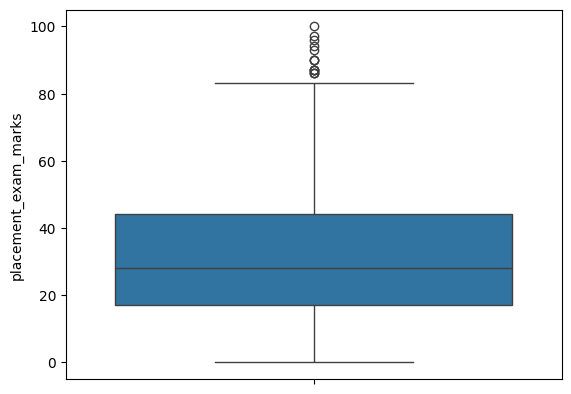

In [8]:
sns.boxplot(df['placement_exam_marks'])

In [9]:
#Finding the IQR
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [10]:
percentile25

np.float64(17.0)

In [11]:
# Calculating IQR
iqr = percentile75-percentile25

In [12]:
iqr

np.float64(27.0)

In [13]:
upper_limit = percentile75 + 1.5*iqr
lower_limit = percentile25 - 1.5*iqr

In [14]:
print(upper_limit)
print(lower_limit)

84.5
-23.5


From here we can see that the upper_limit has got some outlier but the lower_limit has no outlier at all

# Finding Outliers

In [15]:
df[df['placement_exam_marks'] > upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


# Trimming

In [16]:
new_df = df[df['placement_exam_marks'] < upper_limit]

In [17]:
new_df.shape

(985, 3)

# Capping

In [18]:
new_df_cap = df.copy()
new_df_cap['placement_exam_marks']= np.where(new_df_cap['placement_exam_marks'] > upper_limit, upper_limit,
                                             np.where(new_df_cap['placement_exam_marks'] < lower_limit, lower_limit,
                                                       new_df_cap['placement_exam_marks'])
                                             )

In [19]:
new_df_cap.shape

(1000, 3)